# Tutorial 2: Data Pre-processing

## Objectives

After this tutorial you will be able to:

- Learn techniques for data cleaning, pre-processing, and feature engineering relevant to chemical processes.

<h2>Table of Contents</h2>

<ol>
    <li>
        <a href="#1">Linear Regression</a>
    </li>
    <br>
    <li>
        <a href="#2">Logistic Regression</a>
    </li>
    <br>
    <li>
        <a href="#3">K-Nearest Neighbor (KNN)</a>
    </li>
    <br>
</ol>


<hr id="1">
<h2>1. Linear Regression</h2>


### **Overview**
- Linear regression is a supervised learning algorithm used for regression tasks.
- It models the relationship between a dependent variable (target) and one or more independent variables (features) using a linear equation.
- The goal is to find the best-fitting linear line that minimizes the difference between actual and predicted values.
- It assumes a linear relationship between features and the target variable.
- Commonly used techniques for fitting linear regression models include Ordinary Least Squares (OLS) and Gradient Descent.


<div style="text-align: center; margin:2rem;">
    <img src="linear-regression.webp">
    <br>
    <small>*source: https://medium.com/@thaddeussegura/multiple-linear-regression-in-200-words-data-8bdbcef34436</small>
</div>


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Advantages**
- Ease of implementation and understanding due to simplicity.
- Coefficients provide interpretability by indicating variable relationships.
- Handles large datasets efficiently with low computational demands.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Disadvantages**
- Assumes linear relationships, limiting applicability to nonlinear data.
- Vulnerable to noise and outliers, impacting model accuracy.
- Multicollinearity issues arise with highly correlated features.
- Limited performance on non-linear datasets, requiring more complex models.
- May not capture complex patterns accurately, leading to underfitting.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Selection Guidelines**
- The target variable is continuous.
- The relationship between the features and the target is believed to be linear.
- Interpretability of coefficients is important.
- Outliers are minimal, or their impact can be mitigated.


<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Applications**
- Predictive Modeling: Predicts product yields or reaction rates based on experimental data.
- Process Optimization: Identifies factors affecting process performance and optimizes conditions.
- Quality Control: Predicts product quality attributes based on process parameters.
- Experimental Design: Analyzes effects of factors on outcomes in designed experiments.

<hr width="50%" style="margin-top: 2rem; margin-bottom: 2rem; margin-left:0">

### **Example**

**Problem Overview:**  
- In a distillation column, accurately measuring the composition of the bottom stream is crucial for process optimization and control. 
- However, direct online measurement can be expensive, cumbersome, or even impossible for certain components. 
- This raises the challenge of predicting the bottom stream composition using readily available data, like temperature readings from various trays within the column.

<div style="text-align: center;">
    <img src="distillation.png" height="500px">
</div>


**Objectives:**  
- Develop a data-driven soft sensor to estimate the composition of the bottom stream (particularly the key component) based on temperature measurements from multiple trays within the distillation column.


**Data:**  
- The data provided consists of temperature readings from different trays with their corresponding measured bottom stream composition at different conditions.
- Process parameters:
    - T12, C
    - T27, C
    - T42, C
    - X_B, -


<hr id="import">

<h2>2. Data Collection</h2>

Import the `Pandas` library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read the data from `distillation_data.csv` into a `Pandas DataFrame`

In [2]:
# Read in the data
df = pd.read_csv('distillation_data.csv')
df.head()

,"T12, C","T27, C","T42, C",XB
0,30.00,45.00,67.00,0.001077
1,30.98,45.63,67.32,0.001170
2,31.27,45.99,67.44,0.001189
3,31.91,46.87,67.89,0.001223
4,32.90,47.57,68.02,0.001379


<hr id="clean">

<h2>3. Data Cleaning and Preparation</h2>

<h5 id="clean-missing">Handle missing values</h5>

Identify missing values

In [3]:
# get more info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T12, C  542 non-null    float64
 1   T27, C  542 non-null    float64
 2   T42, C  541 non-null    float64
 3   XB      542 non-null    float64
dtypes: float64(4)
memory usage: 17.1 KB


In [4]:
# find the number of missing values in each column
df.isna().sum()

T12, C    1
T27, C    1
T42, C    2
XB        1
dtype: int64

Drop rows with "NaN" from certain columns

In [5]:
# drop the rows with missing values in the output column
df.dropna(subset=['XB'], inplace=True)

# replace the missing values in the input columns with the mean of the previous and next values
df.interpolate(method='linear', inplace=True)

<h5 id="clean-duplicates">Remove duplicates</h5>

In [6]:
# find the number of duplicate rows
df.duplicated().sum()

3

In [7]:
# drop the duplicate rows
df.drop_duplicates(inplace=True)

<h5 id="clean-standardize">Standardize data</h5>

In [8]:
# convert all the columns to float
df = df.astype(float)

<h5>Validate cleaned data</h5>

In [9]:
# check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 539 entries, 0 to 542
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T12, C  539 non-null    float64
 1   T27, C  539 non-null    float64
 2   T42, C  539 non-null    float64
 3   XB      539 non-null    float64
dtypes: float64(4)
memory usage: 21.1 KB


In [10]:
# check for duplicates
df.duplicated().sum()

0

<hr id="eda">

<h2>4. Exploratory Data Analysis</h2>

<h3>Descriptive Analysis</h3>

In [11]:
df_desc = df.describe()
df_desc

,"T12, C","T27, C","T42, C",XB
count,539.000000,539.000000,539.000000,539.000000
mean,167.392384,176.746215,203.157653,0.039028
std,79.624091,76.167664,80.238988,0.030611
min,30.000000,45.000000,67.000000,0.001077
25%,99.265000,111.030000,135.065000,0.010935
50%,167.050000,178.210000,202.840000,0.032444
75%,236.225000,241.125000,270.510000,0.062642
max,300.880000,308.400000,490.150000,0.107951


#### Temperature

Box plot

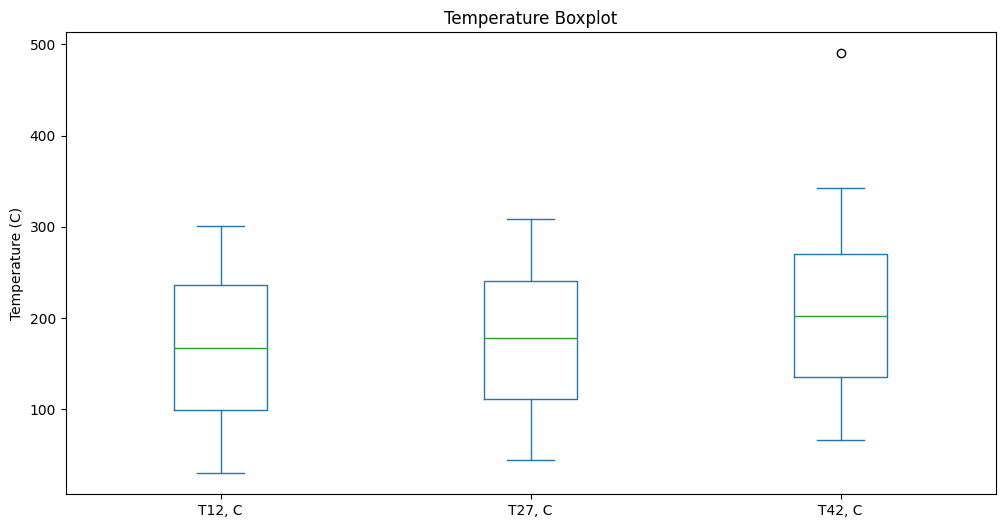

In [12]:
# box plot
df[['T12, C', 'T27, C', 'T42, C']].plot(kind='box', figsize=(12, 6), title='Temperature Boxplot', ylabel='Temperature (C)')
plt.show()

Remove outliers

In [13]:
# remove outliers for all columns
for col in df.columns:
    iqr = df_desc.loc['75%', col] - df_desc.loc['25%', col]
    upper_bound = df_desc.loc['75%', col] + 1.5 * iqr
    lower_bound = df_desc.loc['25%', col] - 1.5 * iqr
    df = df[(df[col] < upper_bound) & (df[col] > lower_bound)]

Remove impractical entries

In [14]:
# find entries with T12 > T27 or T27 > T42
df[(df['T12, C'] > df['T27, C']) | (df['T27, C'] > df['T42, C'])]

,"T12, C","T27, C","T42, C",XB
275,190.34,179.96,203.73,0.033070
401,234.03,239.55,220.50,0.064195


In [15]:
# remove the found entries
df = df[(df['T12, C'] < df['T27, C']) & (df['T27, C'] < df['T42, C'])]
df.describe()

,"T12, C","T27, C","T42, C",XB
count,536.000000,536.000000,536.000000,536.000000
mean,166.983218,176.386231,202.588797,0.038879
std,79.590442,76.134138,79.495650,0.030563
min,30.000000,45.000000,67.000000,0.001077
25%,98.862500,110.685000,134.722500,0.010918
50%,165.830000,177.660000,201.785000,0.032325
75%,236.012500,241.007500,270.320000,0.062478
max,300.880000,308.400000,343.080000,0.107951


#### Bottom Composition

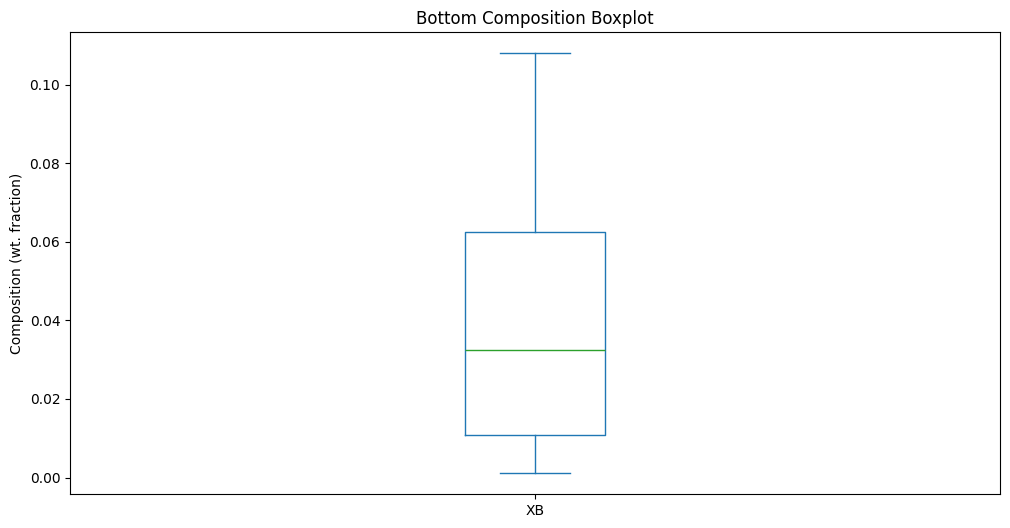

In [16]:
df['XB'].plot(kind='box', figsize=(12, 6), title='Bottom Composition Boxplot', ylabel='Composition (wt. fraction)')
plt.show()

<h3>Correlation Analysis</h3>

Calculate correlation between parameters

In [17]:
# calculate correlation matrix
corr_matrix = df.corr()
corr_matrix

,"T12, C","T27, C","T42, C",XB
"T12, C",1.000000,0.999785,0.999698,0.979061
"T27, C",0.999785,1.000000,0.999650,0.978558
"T42, C",0.999698,0.999650,1.000000,0.981893
XB,0.979061,0.978558,0.981893,1.000000


Visualize the correlation between parameters

<Axes: >

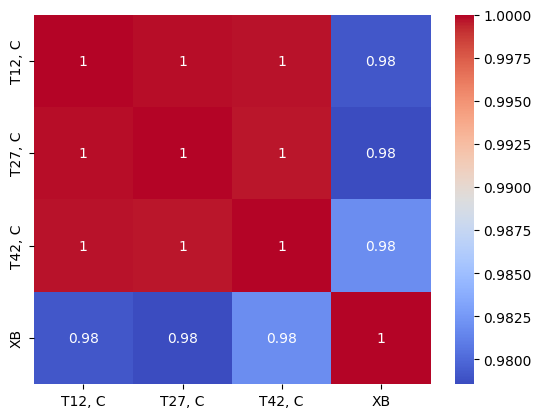

In [18]:
# plot correlation matrix as a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

Visualize the correlation trends

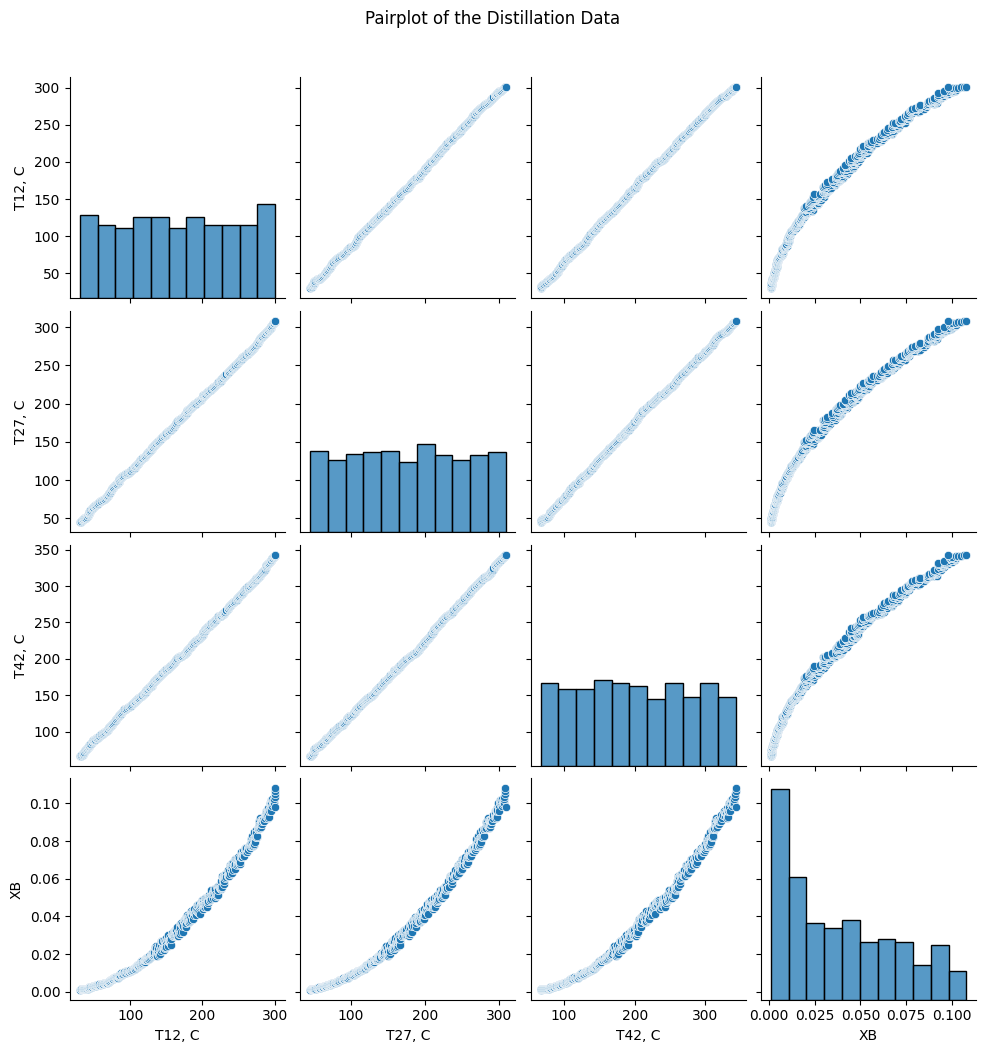

In [19]:
# plot scatter matrix (pairplot)
sns.pairplot(df, diag_kind='hist')

# add figure title
plt.suptitle('Pairplot of the Distillation Data', y=1.05)

plt.show()

<hr style="margin-top: 4rem;">
<h2>Author</h2>

<a href="https://github.com/SamerHany">Samer Hany</a>

<h2>References</h2>

- Ankur Kumar, Jesus Flores-Cerrillo, 2022. Machine Learning in Python for Process Systems Engineering